### Для нашего проекта скачаем датасет games.csv, который содержит в себе информацию о шахматных партиях, сыгранных на одной из самых популярных в мире платформе для игры в онлайн-шахматы lichess.org. Цель проекта - выявить закономерности и факторы, влияющие на победу в шахматной партии, а также определить, какие из них имеют большее значение для итогового результата

In [199]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

# импортируем нужные нам модули


In [200]:
import requests
response = requests.get('https://www.kaggle.com/datasets/datasnaek/chess?resource=download')
response

<Response [200]>

In [201]:
games = pd.read_csv('/content/games.csv.zip')

In [202]:
games.shape

(20058, 16)

Посмотрим на наш датасет

In [203]:
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


Как мы видим, этот датасет содержит информацию о результате сыгранных партий, рейтинге оппонентов, результатах партий, дебютных вариантах и т.д.

In [204]:
games.insert(loc = len(games.columns), column = 'rate_diff', value = (games['white_rating'] - games['black_rating']))

Добавим полезную в будущем колонку rate_diff, которая по вычисляет разницу в рейтингах между оппонентами (затем мы будем сравнивать, как и какая разница в рейтинге влияет на процент побед). Если rate_diff < 0, то рейтинг больше у игрока с черными фигурами

In [205]:
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rate_diff
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,-15
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54


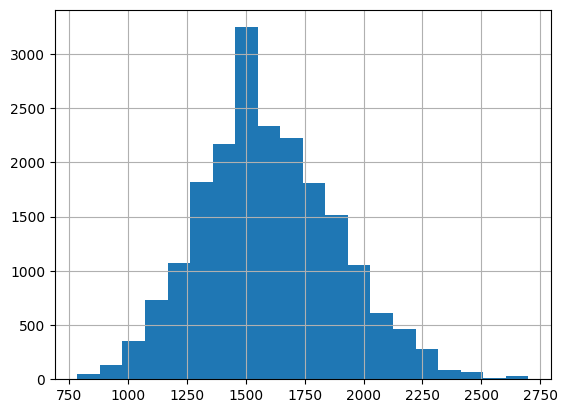

In [206]:
games['white_rating'].hist(bins=20)
plt.show()

Посчитаем основные статистические характеристики этого распределения

In [207]:
round(np.mean(games['white_rating']), 2) # средний рейтинг

1596.63

In [208]:
np.median(games['white_rating']) # медианный рейтинг

1567.0

In [209]:
round(np.sqrt(np.std(games['white_rating'])), 2) # корень из дисперсии -> стандартное отклонение рейтинга

17.07

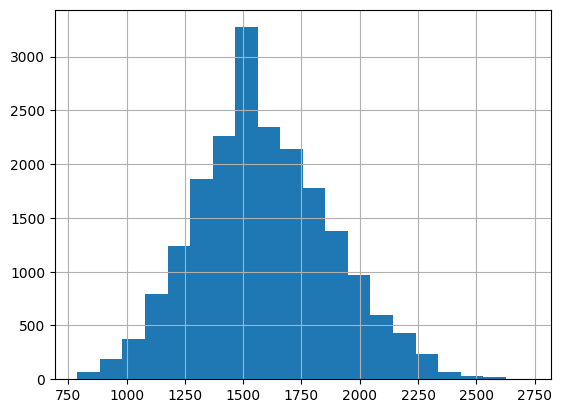

In [210]:
games['black_rating'].hist(bins=20)
plt.show()

In [211]:
print(games['black_rating'].skew()) # если коэффициент ассиметрии > 0, то правый хвост распределения длиннее левого, и наоборот, если коэфф < 0.

0.25851032951990566


С помощью функции skew из библиотеки pandas мы посчитали коэффициент ассиметрии распределения (очевидно, показатели для рейтингов игроков с белыми/черными фигурами в конкретной партии не имеют значимых различий), потому что хвост распределения справа длиннее, чем слева. Это объясняется тем, что гораздо больше людей имеют рейтинг около 1000 пунктов, в то время как людей с рейтингом выше 2300 уже значительно меньше.

Используя библиотеку matplotlib, мы вывели распределение рейтингов 40 000 игроков, данные о которых есть в датасете. Как мы видим, самый частовстречающийся из них - 1500, так как именно такой рейтинг выдает платформа lichess новичкам. 

In [212]:
games['winner'] = games['winner']. replace ('white', 1)
games['winner'] = games['winner']. replace ('black', 0)
games['winner'] = games['winner']. replace ('draw', 1/2)
games['rated'] = games['rated']. replace ('True', 1)
games['rated'] = games['rated']. replace ('False', 0)

Для удобства поменяем значения в колонке winner с помощью метода работы с датафреймами replace: теперь победа белых будет означать 1 набранное очко, победа черных (== проигрыш белых) 0 очков, а ничья - 1/2

In [213]:
games = games.astype({'winner': np.float})

<ipython-input-213-230d220cabe6>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  games = games.astype({'winner': np.float})


In [214]:
games['rated'] = pd.to_numeric(games['rated'])

In [215]:
games = games.loc[games['rated'] == 1]

In [216]:
games.shape

(16155, 17)

Также преобразуем наш датафрейм: нас интересуют только рейтинговые игры, поэтому мы убрали из него все игры со значением False в столбце rated. В обновленном датафрейме стало на примерно на 4000 строчек меньше

In [217]:
cor_columns = ['winner', 'rate_diff', 'black_rating', 'white_rating']

[]

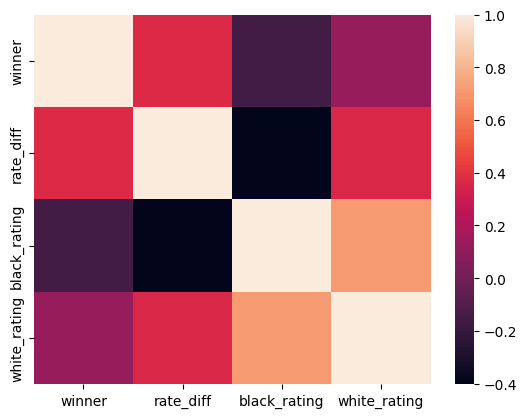

In [218]:
sns.heatmap(games[cor_columns].corr())
plt.plot()

Ожидаемая закономерность: корреляция между разницей в рейтинге и победами достаточно большая - около 0,4

In [219]:
new_ones = ['winner', 'rate_diff']

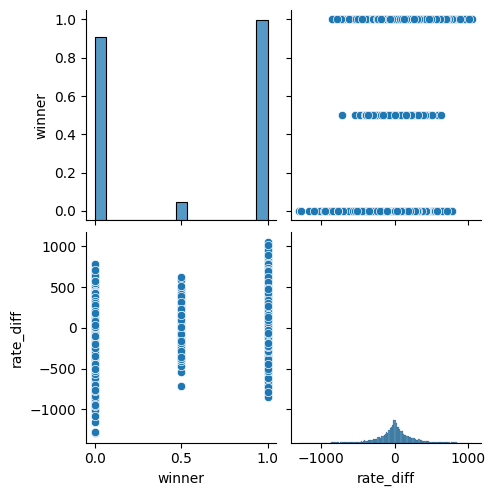

In [220]:
sns.pairplot(games[new_ones])

Как мы видим, существует не самая большая, но заметная корреляция между ростом разницы в рейтинге и верояностью победы (значения -1000, 0 говорят о победе черных, где у них было преимущество более, чем в 1000 пунктов рейтинга)

#### С помощью библиотеки seaborn мы можем увидеть, как lichess подбирает соперников для игрока - это делается, исходя из примерного равенства их рейтингов. Редкие выбросы могут объясняться отсутствием рейтинга у одного из них, дружеской партией или информацией о турнирной партии (в турнире жеребьевка проходит на основании количества очков, набранных в нем, поэтому рейтинги игроков в паре могут сильно отличаться)

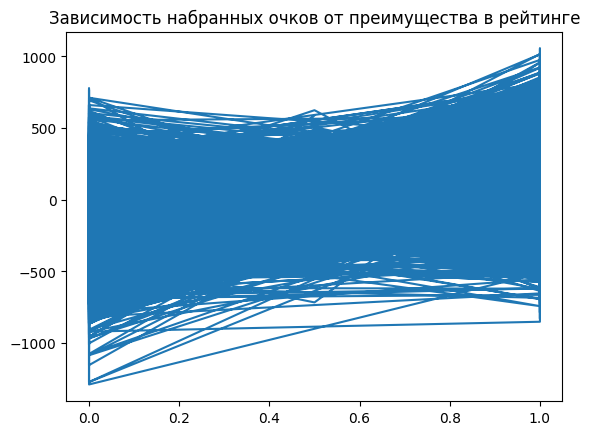

In [221]:
plt.plot(games['winner'], games['rate_diff'])   
plt.title('Зависимость набранных очков от преимущества в рейтинге')
plt.show()   

In [222]:
games_white = games.loc[games['winner'] == 1]

In [223]:
ratings_white = games_white.loc[games['rate_diff'] > 100]
ratings_white.shape

(3129, 17)

In [224]:
games_black = games.loc[games['winner'] == 0]

In [225]:
ratings_black = games_black.loc[games['rate_diff'] < -100]
ratings_black.shape

(2810, 17)

Из последних строчек кода мы наблюдаем интереснейшую закономерность: даже при относительно большом преимуществе в рейтинге (более 100 пунктов по ЭЛО) черные побеждают ощутимо реже, чем белые. Это объясняется изначальным, пусть и небольшим преимуществом белых в игре (из-за того, что они ходят первыми).

Мы можем попытаться предсказывать результаты шахматной партии с помощью нейронных сетей - например, достаточно простого перцептрона. Конечно, он не сможет выдавать 100% результат, а исход шахматной партии, зависит от множества различных факторов, кроме рейтинга (временной контроль, выбор дебюта, стиль соперников и т.д.), но попробовать стоит. Для начала попытаемся взять данные о партиях с сайта chessbase с помощью веб-скрепиинга

In [226]:
from bs4 import BeautifulSoup

# URL страницы с партиями
url = 'https://database.chessbase.com/?lang=en'

# Отправляем GET-запрос на страницу
response = requests.get(url)

# Создаем объект BeautifulSoup для парсинга HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Находим таблицу с партиями
table = soup.find('table', {'class': 'table table-striped table-hover'})

# Создаем пустой датафрейм
chessgames = pd.DataFrame(columns=['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result'])

# Проходимся по каждой строке таблицы
games_table = soup.find('table', {'class': 'TableBase'})
if table is not None:
  for row in table.find_all('tr')[1:]:
      # Получаем значения ячеек
      cells = row.find_all('td')
      event = cells[0].text.strip()
      site = cells[1].text.strip()
      date = cells[2].text.strip()
      rnd = cells[3].text.strip()
      white = cells[4].text.strip()
      black = cells[5].text.strip()
      result = cells[6].text.strip()
      
      # Добавляем строки в датафрейм
      chessgames = chessgames.append({
          'Event': event,
          'Site': site,
          'Date': date,
          'Round': rnd,
          'White': white,
          'Black': black,
          'Result': result
      }, ignore_index=True)
else:
    print('Таблица не найдена')

print(chessgames)

Таблица не найдена
Empty DataFrame
Columns: [Event, Site, Date, Round, White, Black, Result]
Index: []


Мы попытались получить данные с сайта https://database.chessbase.com/, однако на нем, как оказалось стоит защита от скреппинга, поэтому будем брать данные вручную, их нужно не так много для обучения нейронной сети предсказывать результаты.

In [227]:
def activator(x):
  return 1/(1+np.exp(-x)) # сигмоидальная функция активации считается лучшей
  # для генерации весов > 0
inp = np.array([[2712, 2695], # дадим нейросети 10 шахматных партий с рейтнгами соперников
                            [2750, 2600],
                            [2603, 2605],
                            [2632, 2670],
                            [2722, 2658],
                            [2768, 2738],
                            [2764, 2760],
                            [2704, 2638],
                            [2738, 2853],
                            [2716, 2631]
                            ])
out = np.array([[1, 3, 1, 3, 1, 1, 3, 1, 0, 3]]).T # для большей показательности победе сопоставим 3 очка, ничье - 1, а поражению 0 по аналогии с футболом
# И соответсвующие им результаты партий (используя библиотеку np для транспонирования матриц и создания массивов)
np.random.seed(10)
weights = np.random.random((2, 1)) 

print(weights)
# делаем метод обратного распространения (самый популярный в обучении нейросетей)
for i in range(30000): # создадим цикл из 30000 повторений для подбора весов
 
  overall_outputs = activator(np.dot(inp, weights)) # объединяем в один массив входные данные и веса

  err = out - overall_outputs # определяем значение обратного распространения ошибки
  adjustments = np.dot(inp.T, err*(overall_outputs*(1-overall_outputs)))

  weights += adjustments

print('Веса', weights)

new_input = np.array([[2681, 2721]])
outputs = activator(np.dot(new_input, weights))
print('Новые результаты', outputs, sep = '\t') # по мнению нейросети в партии со следующими рейтингами будет зафиксирована ничья (рейтинги взяты с сайта chessbase, партия Нихал Сарин - Никита Витюгов, 2023, завершившаяся вничью)

[[0.77132064]
 [0.02075195]]
Веса [[0.77132064]
 [0.02075195]]
Новые результаты	[[1.]]


Итак, мы получили предсказательную модель, которая подбирает вероятность, с которой в партии между игроками с рейтингами X и Y получится исход Z. Нейросеть выдает неидеальные значения, но при дальнейшем обучении на партиях сможет выдавать что-то более похожее на правду при других тестах

#### Подводя итоги проекта, мы изучили зависимость исхода шахматной партии от различных факторов, построили между ними корреляцию и написали простую нейронную предсказательную сеть для определения результата партии. Как и предполагалось, победитель во многом определяется цветом фигур и разницей в рейтинге (зависимость этих двух факторов также была изучена)